Nama : Dea Yuliani Sabrina

Dataset ini diambil dari : https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/code

## Domain Proyek

### Latar Belakang

Diabetes mellitus adalah penyakit kronis yang terjadi ketika tubuh tidak dapat memproduksi atau menggunakan insulin secara efektif. Menurut WHO, pada tahun 2021, sekitar 422 juta orang di seluruh dunia hidup dengan diabetes, dan angka ini terus meningkat setiap tahun. Deteksi dini terhadap risiko diabetes menjadi sangat penting untuk mencegah komplikasi jangka panjang seperti gagal ginjal, stroke, dan penyakit jantung.

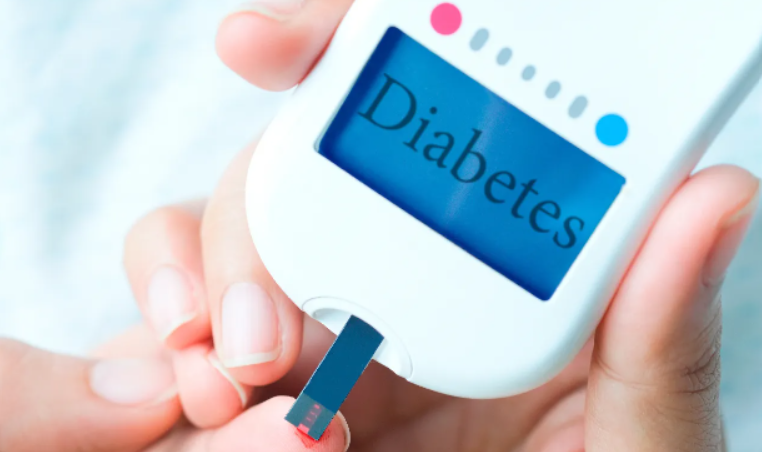

### Mengapa Masalah Ini Harus Diselesaikan?

Deteksi dini diabetes dapat menyelamatkan nyawa dan mengurangi beban sistem kesehatan. Dengan pendekatan machine learning, kita dapat mengidentifikasi pola dari data medis pasien dan memprediksi kemungkinan diabetes lebih awal dan lebih akurat.

### Referensi :
World Health Organization. "Diabetes." WHO, 2023

## Business Understanding

Perusahaan akan mengembangkan sebuah sistem prediksi Diabetes untuk menjawab permasalahan berikut.

- Bagaimana prevalensi diabetes bervariasi berdasarkan kelompok usia dan jenis kelamin?
- Berapa rata-rata BMI, kadar glukosa, dan HbA1c pada penderita diabetes vs non-diabetes?
- Fitur mana yang paling penting dalam memprediksi kemungkinan diabetes?

Untuk menjawab pertanyaan tersebut, Anda akan membuat predictive modelling dengan tujuan atau goals sebagai berikut:

- Menganalisis distribusi diabetes berdasarkan kelompok usia dan jenis kelamin.
- Menganalisis perbedaan rata-rata fitur penting (BMI, HbA1c, glukosa) pada penderita diabetes dan non-diabetes.
- Membangun model machine learning dan mengidentifikasi fitur paling berpengaruh dalam prediksi diabetes.

Pernyataan solusi dari masalah dan tujuan diatas :

- Gunakan model non-linear seperti Random Logistic.
- Gunakan model non-linear seperti Random Forest Classifier.
-  Gunakan model non-linear seperti Random XGBoost Classifier.

## Data Understanding

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [37]:
# Load data
df = pd.read_csv("https://raw.githubusercontent.com/deayulianis/Prediksi-Diabetes/refs/heads/main/archive/diabetes_prediction_dataset.csv")

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Dari output terlihat bahwa:

- Melihat 5 baris pertama dari dataset yang berisi data diabetes.

Variable - variable pada dataset:

- gender – Jenis kelamin responden (Male, Female, Other)
- age – Usia responden (dalam tahun)
- hypertension – Riwayat hipertensi (1 = ya, 0 = tidak)
-heart_disease – Riwayat penyakit jantung (1 = ya, 0 = tidak)
- smoking_history – Riwayat merokok (never, current, former, dll.)
- bmi – Indeks Massa Tubuh
- HbA1c_level – Tingkat HbA1c (indikator rata-rata gula darah)
- blood_glucose_level – Kadar glukosa dalam darah
- diabetes – Label target (1 = mengidap diabetes, 0 = tidak)

## Exploratory Data Analysis - Deskripsi Variabel

In [38]:
# Cek ukuran (dimensi) dari dataset
df.shape

(100000, 9)

Pada tahap ini digunakan untuk mengetahui ukuran (dimensi) dari dataset yaitu 100000 baris dengan 9 kolom.

In [39]:
# Cek struktur dasar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Dari output terlihat bahwa:

- Terdapat 2 kolom dengan tipe object, yaitu: gender dan smoking_history. Kolom ini merupakan categorical features (fitur non-numerik).
- Terdapat 3 kolom numerik dengan tipe data float64 yaitu: age, bmi, dan HbA1c_level . Ini merupakan fitur numerik yang merupakan hasil pengukuran secara fisik.
- Terdapat 4 kolom numerik dengan tipe data int64, yaitu:  hypertension, heart_disease, blood_glucose_level, dan diabetes. Kolom ini merupakan target fitur kita.

In [40]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Pada tahap ini, saya menggunakan perintah df.describe() untuk melakukan analisis statistik deskriptif terhadap kolom-kolom numerik dalam dataset. Tujuannya adalah untuk mendapatkan gambaran umum mengenai sebaran data, nilai minimum dan maksimum, serta nilai-nilai statistik seperti rata-rata (mean), standar deviasi (std), dan nilai kuartil (25%, 50%, 75%).

Hasilnya menunjukkan bahwa usia (age) peserta dalam data memiliki rentang antara 0.08 hingga 80 tahun, dengan rata-rata sekitar 41.89 tahun. Nilai indeks massa tubuh (bmi) berkisar antara 10.01 hingga 95.69, menunjukkan kemungkinan adanya outlier yang perlu ditelusuri lebih lanjut. Kolom HbA1c_level, yang berkaitan dengan kadar gula darah dalam jangka panjang, memiliki rata-rata 5.53 dengan maksimum 9.0. Sementara itu, blood_glucose_level memiliki sebaran yang cukup luas, dari 80 hingga 300, dengan rata-rata sekitar 138.

Kolom hypertension, heart_disease, dan diabetes semuanya bersifat biner (0 atau 1), yang mengindikasikan ada atau tidaknya kondisi tersebut pada pasien. Dari nilai rata-rata kolom ini, diketahui bahwa hanya sebagian kecil peserta yang memiliki hipertensi (7.5%), penyakit jantung (3.9%), atau diabetes (8.5%).

Informasi ini sangat berguna untuk tahap pra-pemrosesan, seperti identifikasi outlier, normalisasi, serta memahami distribusi dan proporsi data yang bisa memengaruhi performa model prediktif di tahap selanjutnya.

## Menangani Nilai Usia yang Tidak Masuk Akal (age < 1)

In [41]:
# Filter data usia ≥ 1
df = df[df['age'] >= 1]

# Cek kembali
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99089.000000,99089.000000,99089.000000,99089.000000,99089.000000,99089.000000,99089.000000
mean,42.266093,0.075538,0.039782,27.413036,5.529091,138.104835,0.085781
std,22.266528,0.264259,0.195449,6.586258,1.071261,40.761804,0.280042
min,1.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.770000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.640000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


Dari output terlihat bahwa:
- Usia rata-rata peserta adalah dewasa (sekitar 42 tahun). Distribusi cenderung merata antara usia muda dan tua.

## Deteksi Outlier Ekstrem dengan IQR Method dan Visualisasi

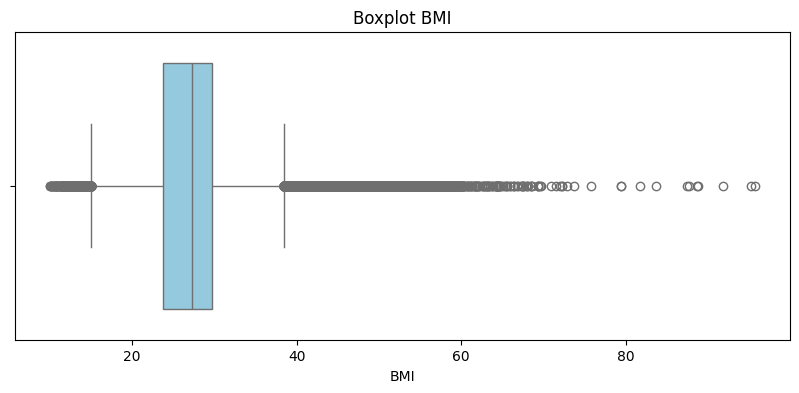

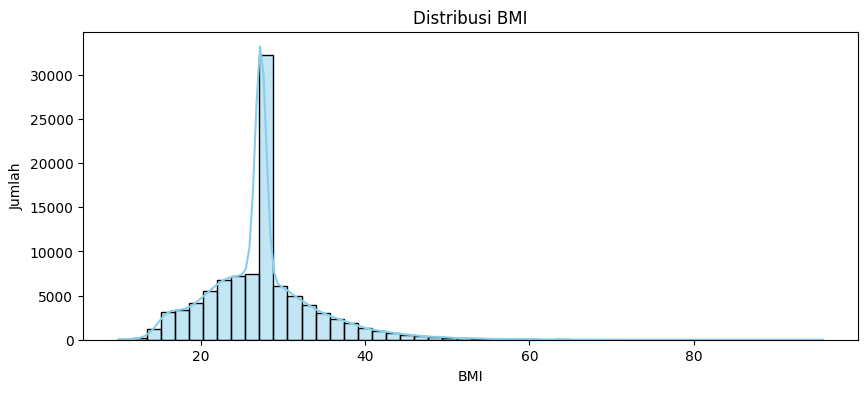

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns


# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['bmi'], color='skyblue')
plt.title('Boxplot BMI')
plt.xlabel('BMI')
plt.show()

# Histogram
plt.figure(figsize=(10, 4))
sns.histplot(df['bmi'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi BMI')
plt.xlabel('BMI')
plt.ylabel('Jumlah')
plt.show()

Pada tahap ini, saya melakukan eksplorasi awal terhadap fitur **BMI** dengan tujuan memahami **distribusi dan karakteristik datanya**.

Visualisasi boxplot digunakan untuk mengidentifikasi **sebaran nilai dan outlier**, yang menunjukkan banyak nilai ekstrem di sisi kanan (BMI tinggi).

Sementara itu, histogram menampilkan bentuk distribusi yang **skew ke kanan**, artinya sebagian besar individu memiliki BMI di bawah rata-rata, namun terdapat sejumlah kecil dengan nilai BMI sangat tinggi.

Analisis ini penting sebagai dasar untuk **preprocessing**, seperti penanganan outlier atau transformasi data sebelum pemodelan.


In [43]:
# Hitung Q1, Q3, dan IQR
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR = {IQR:.2f}")
print(f"Batas bawah = {lower_bound:.2f}")
print(f"Batas atas = {upper_bound:.2f}")
print(f"Nilai BMI tertinggi = {df['bmi'].max()}")

IQR = 5.87
Batas bawah = 14.96
Batas atas = 38.45
Nilai BMI tertinggi = 95.69


Pada tahap ini, saya menghitung IQR (Interquartile Range) untuk fitur BMI guna mengidentifikasi batas bawah dan atas deteksi outlier.

Hasilnya menunjukkan:

IQR = 5.87

Batas bawah = 14.96

Batas atas = 38.45

Nilai BMI tertinggi = 95.69

Karena nilai tertinggi jauh di atas batas atas, ini menegaskan bahwa dataset mengandung outlier ekstrem yang perlu dipertimbangkan dalam proses cleaning atau transformasi data sebelum pemodelan.

In [44]:
# Hapus outlier ekstrem pada BMI
df_cleaned = df[df['bmi'] <= upper_bound].copy()

print(f"Jumlah data setelah menghapus outlier BMI: {len(df_cleaned)}")

Jumlah data setelah menghapus outlier BMI: 93069


Pada tahap ini, saya menghapus outlier ekstrem pada fitur BMI dengan cara menyaring data yang berada di atas batas atas (38.45), sesuai perhitungan IQR sebelumnya.

Tujuannya adalah untuk mengurangi pengaruh nilai ekstrem yang dapat merusak performa model machine learning.

Setelah pembersihan, jumlah data berkurang menjadi 93.069 sampel, yang lebih representatif terhadap distribusi BMI normal dalam populasi.

In [45]:
df.shape

(99089, 9)

Pada tahap ini, saya memeriksa ukuran setelah melakukan penghapusan outlier pada dataset menggunakan df.shape, yang menunjukkan bahwa data terdiri dari 99.089 baris dan 9 kolom.

Informasi ini menjadi patokan awal untuk membandingkan perubahan jumlah data setelah dilakukan pembersihan outlier, khususnya pada fitur BMI.

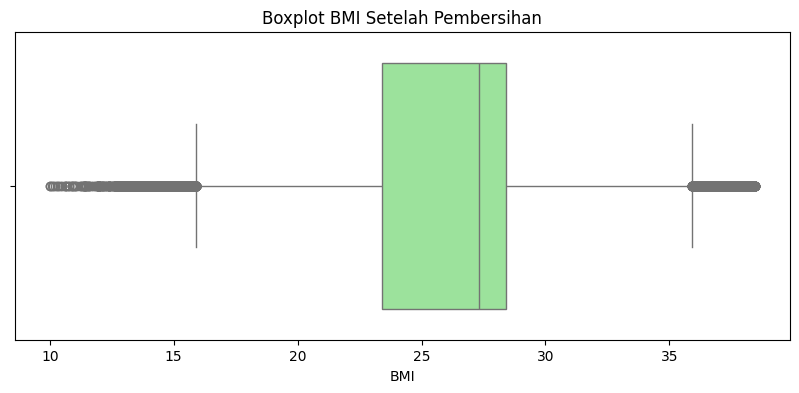

In [46]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_cleaned['bmi'], color='lightgreen')
plt.title('Boxplot BMI Setelah Pembersihan')
plt.xlabel('BMI')
plt.show()

Pada tahap ini, saya memvisualisasikan kembali boxplot fitur BMI setelah pembersihan outlier menggunakan data df_cleaned.

Tujuannya adalah untuk mengevaluasi hasil pembersihan, memastikan bahwa nilai-nilai ekstrem di atas batas atas telah berhasil dihapus.

Hasil boxplot menunjukkan distribusi yang lebih rapat dan simetris, tanpa adanya outlier ekstrem, sehingga data lebih bersih dan siap digunakan untuk proses pemodelan machine learning.

##  Cek Missing Value

In [47]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


Pada tahap ini, saya memeriksa nilai yang hilang (missing values) di seluruh kolom dataset menggunakan df.isnull().sum().

Hasilnya menunjukkan bahwa tidak ada nilai yang hilang di semua fitur (semua bernilai 0), sehingga tidak diperlukan proses imputasi atau penanganan missing value.

Data ini sudah lengkap dan siap untuk tahap selanjutnya, seperti eksplorasi lebih lanjut atau pemodelan.

## Univariate Analysis

**Categorical Feature**

In [48]:
numerical_features = ['age', 'bmi', 'HbA1c_level', 'hypertension', 'heart_disease', 'blood_glucose_level', 'diabetes']
categorical_features = ['gender', 'smoking_history']

Pada tahap ini, saya mengelompokkan fitur menjadi dua jenis utama:

numerical_features: berisi fitur numerik seperti usia, BMI, kadar HbA1c, tekanan darah, dan kadar glukosa. Termasuk juga variabel target diabetes karena berupa nilai biner (0 atau 1).

categorical_features: berisi fitur kategorikal seperti jenis kelamin dan riwayat merokok.

Tujuan pengelompokan ini adalah untuk memudahkan proses analisis, visualisasi, dan preprocessing, karena fitur numerik dan kategorikal biasanya memerlukan perlakuan yang berbeda dalam pemodelan machine learning.

        jumlah sampel  persentase
gender                           
Female          58119        58.7
Male            40952        41.3
Other              18         0.0


<Axes: title={'center': 'gender'}, xlabel='gender'>

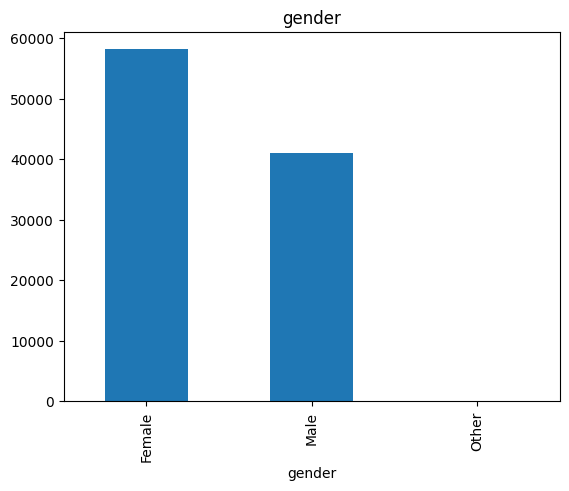

In [49]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)

summary_df = pd.DataFrame({
    'jumlah sampel': count,
    'persentase': percent.round(1)
})

print(summary_df)
count.plot(kind='bar', title=feature)

Pada tahap ini, saya melakukan eksplorasi awal terhadap fitur kategorikal gender untuk memahami distribusi datanya.

Distribusi jumlah sampel untuk masing-masing kategori pada fitur gender adalah sebagai berikut:

- Female: 58.119 sampel (58.7%)
- Male: 48.952 sampel (41.3%)
- Other: 18 sampel (0.0%)

Dari hasil ini, terlihat bahwa mayoritas sampel berasal dari kelompok perempuan, diikuti oleh laki-laki, sementara kategori lainnya hanya mencakup sebagian sangat kecil dari data (0.0%).

Visualisasi bar chart juga menunjukkan perbedaan distribusi yang cukup signifikan antara kategori gender tersebut. Informasi ini penting untuk memahami proporsi data sebelum melakukan pemodelan, terutama jika fitur gender akan digunakan sebagai variabel prediktor.

                 jumlah sampel  persentase
smoking_history                           
never                    35058        35.4
No Info                  34952        35.3
former                    9352         9.4
current                   9285         9.4
not current               6438         6.5
ever                      4004         4.0


<Axes: title={'center': 'smoking_history'}, xlabel='smoking_history'>

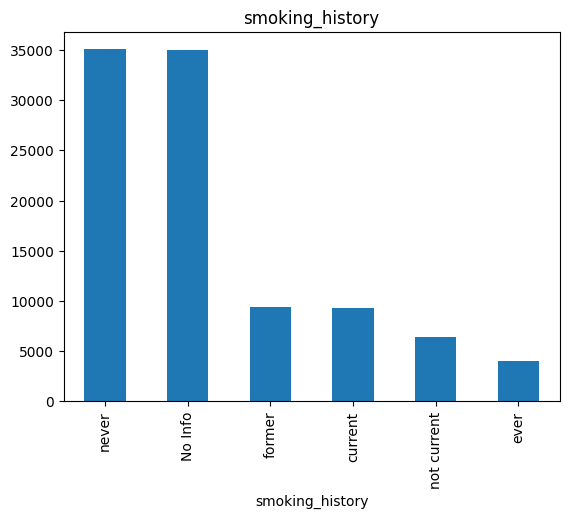

In [50]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)

summary_df = pd.DataFrame({
    'jumlah sampel': count,
    'persentase': percent.round(1)
})

print(summary_df)
count.plot(kind='bar', title=feature)

Pada tahap ini, saya melakukan eksplorasi awal terhadap fitur kategorikal smoking_history untuk memahami distribusi data berdasarkan riwayat merokok.

Distribusi jumlah sampel untuk masing-masing kategori adalah sebagai berikut:

- never: 35.058 sampel (35.4%)
- No Info: 34.952 sampel (35.3%)
- former: 9.352 sampel (9.4%)
- current: 9.258 sampel (9.4%)
- not current: 6.438 sampel (6.5%)
- ever: 4.004 sampel (4.0%)

Dari hasil ini, terlihat bahwa sebagian besar data terdiri dari individu yang tidak pernah merokok (35.4%) dan yang tidak memiliki informasi riwayat merokok (35.3%). Kategori lainnya memiliki proporsi yang lebih kecil, di mana kategori former, current, not current, dan ever masing-masing berada di bawah 10%.

Visualisasi bar chart mendukung hal ini dengan menunjukkan dua batang tertinggi untuk kategori never dan No Info, sedangkan kategori lainnya relatif lebih rendah.

Informasi ini penting untuk diperhatikan dalam proses pra-pemodelan, terutama jika fitur smoking_history akan digunakan sebagai variabel input. Proporsi yang tidak seimbang dan keberadaan kategori No Info menunjukkan kemungkinan perlunya strategi penanganan data tambahan, seperti encoding khusus atau pemrosesan data hilang.

## Numerical Feature

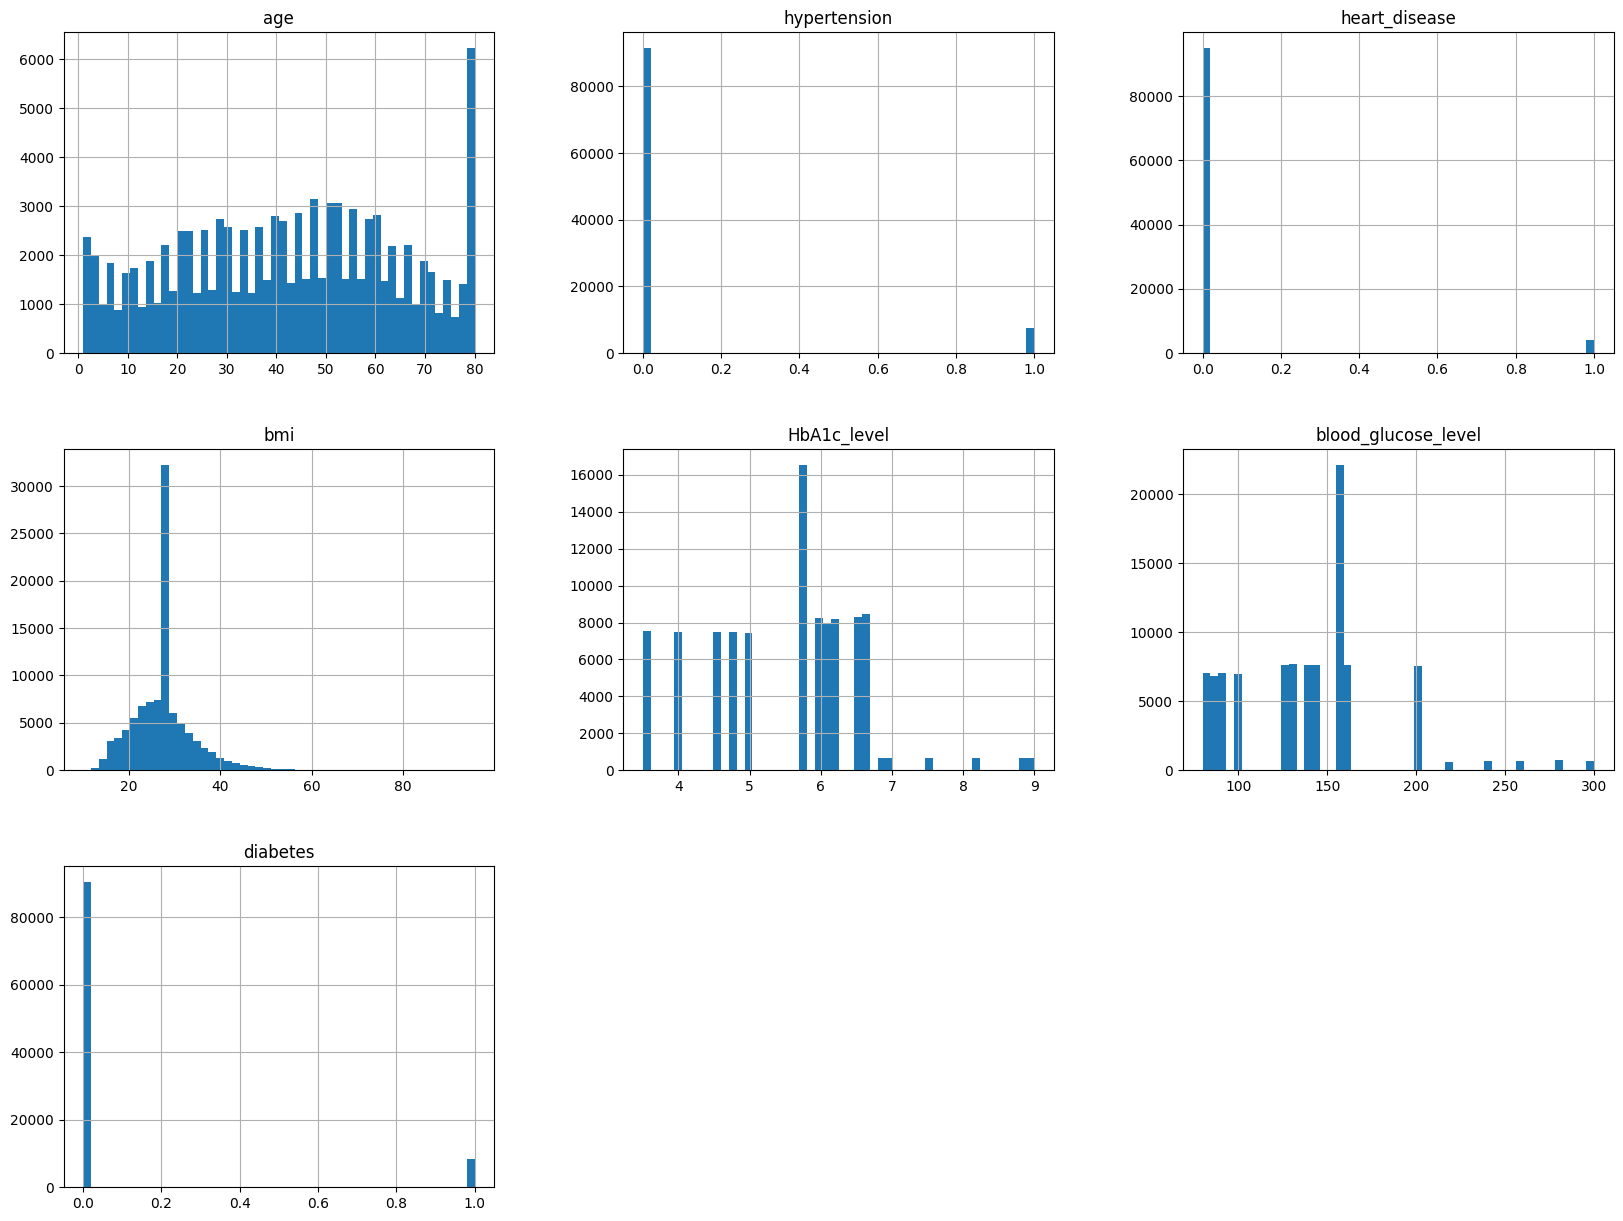

In [51]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Pada tahap ini, saya melakukan eksplorasi data awal terhadap fitur-fitur numerikal menggunakan histogram. Visualisasi ini membantu memahami distribusi nilai dari setiap fitur.

Berikut ringkasan pengamatan untuk masing-masing fitur:

* **age**: Distribusi usia relatif merata dengan lonjakan tinggi pada usia sekitar 80 tahun, yang mengindikasikan adanya akumulasi data pada batas usia maksimum.

* **hypertension** dan **heart\_disease**: Kedua fitur ini adalah biner (0 atau 1), dan distribusinya sangat tidak seimbang. Mayoritas data bernilai 0 (tidak memiliki hipertensi atau penyakit jantung), sementara hanya sebagian kecil yang bernilai 1.

* **bmi**: Terdistribusi positif skewed (condong ke kanan). Sebagian besar nilai berada pada kisaran 15–40, dengan puncak signifikan di sekitar 20–25. Ada kemungkinan nilai pencilan (outlier) di bagian kanan.

* **HbA1c\_level**: Data terlihat dalam bentuk diskrit dengan banyak nilai yang berulang (seperti 6.0, 6.5, dll), menunjukkan pengukuran dengan nilai-nilai standar tertentu. Distribusinya tidak merata, namun nilai antara 4 dan 7 mendominasi.

* **blood\_glucose\_level**: Distribusi bersifat multimodal (terdapat lebih dari satu puncak), dengan konsentrasi data pada kisaran 100–200. Beberapa nilai ekstrem juga tampak berada di atas 250, yang kemungkinan merupakan outlier.

* **diabetes**: Seperti fitur biner lainnya, distribusinya sangat tidak seimbang, dengan sebagian besar data bernilai 0 (tidak menderita diabetes), dan sebagian kecil bernilai 1 (menderita diabetes).

Hasil eksplorasi ini memberikan insight awal yang penting:

* Terdapat **ketidakseimbangan kelas** pada fitur biner (`hypertension`, `heart_disease`, dan `diabetes`).
* Fitur seperti `bmi`, `blood_glucose_level`, dan `age` mungkin mengandung **outlier** yang perlu ditangani.
* Beberapa fitur numerikal memiliki **distribusi tidak normal**, yang dapat memengaruhi performa algoritma tertentu.

Langkah selanjutnya yang dapat dilakukan termasuk transformasi data (seperti normalisasi atau log transform), penanganan outlier, dan balancing data bila diperlukan untuk keperluan pemodelan.


## Multivariate Analysis

### Categorical Feature

<ipython-input-52-f3ee54771e3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="diabetes", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-52-f3ee54771e3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="diabetes", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")


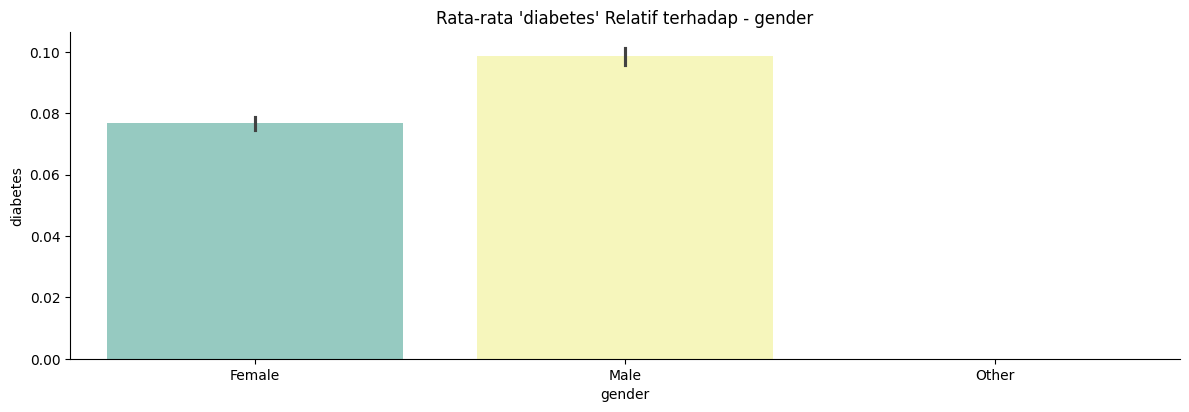

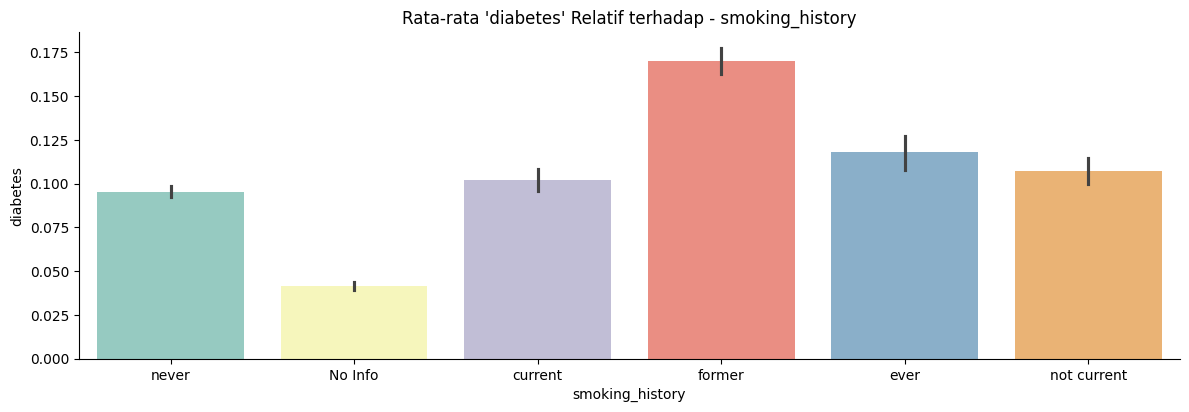

In [52]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="diabetes", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'diabetes' Relatif terhadap - {}".format(col))

Pada tahap ini, saya menganalisis **rata-rata kemunculan diabetes** (`diabetes` bernilai 1) terhadap dua fitur kategorikal: `gender` dan `smoking_history`. Nilai rata-rata pada grafik batang ini merepresentasikan **proporsi individu yang menderita diabetes** dalam setiap kategori.

1. **Rata-rata diabetes terhadap gender**

* **Female**: sekitar 7.5%
* **Male**: sekitar 10%
* **Other**: tidak terlihat signifikan karena jumlah sampel sangat kecil (hampir nol)

Dari visualisasi ini, terlihat bahwa **laki-laki memiliki proporsi penderita diabetes yang lebih tinggi** dibandingkan perempuan. Perbedaan ini dapat menjadi insight awal bahwa gender berpotensi menjadi variabel prediktif yang relevan dalam model klasifikasi diabetes.

2. **Rata-rata diabetes terhadap smoking\_history**

* **former** (mantan perokok): memiliki proporsi tertinggi, sekitar **17%**
* Diikuti oleh **ever** (\~12%) dan **not current** (\~11%)
* **current** (perokok aktif): \~10%
* **never** (tidak pernah merokok): \~9.5%
* **No Info**: proporsi terendah (\~4%)

Dari hasil ini dapat disimpulkan bahwa:

* Riwayat merokok **berkorelasi positif** dengan kejadian diabetes, terutama pada individu yang pernah merokok namun sudah berhenti (*former*).
* Individu dengan status *No Info* justru memiliki proporsi terendah, namun hal ini bisa jadi karena ketidaklengkapan informasi atau bias dalam pelabelan data.

Hasil eksplorasi ini sangat berguna dalam:

* Menentukan pentingnya fitur (feature importance)
* Mengarahkan strategi feature engineering atau encoding untuk fitur kategorikal
* Memahami potensi adanya bias atau ketidakseimbangan dalam data

Langkah selanjutnya dapat berupa uji statistik untuk menguji signifikansi hubungan ini, atau langsung masuk ke tahap preprocessing dan pelatihan model klasifikasi.

### Numerical Feature

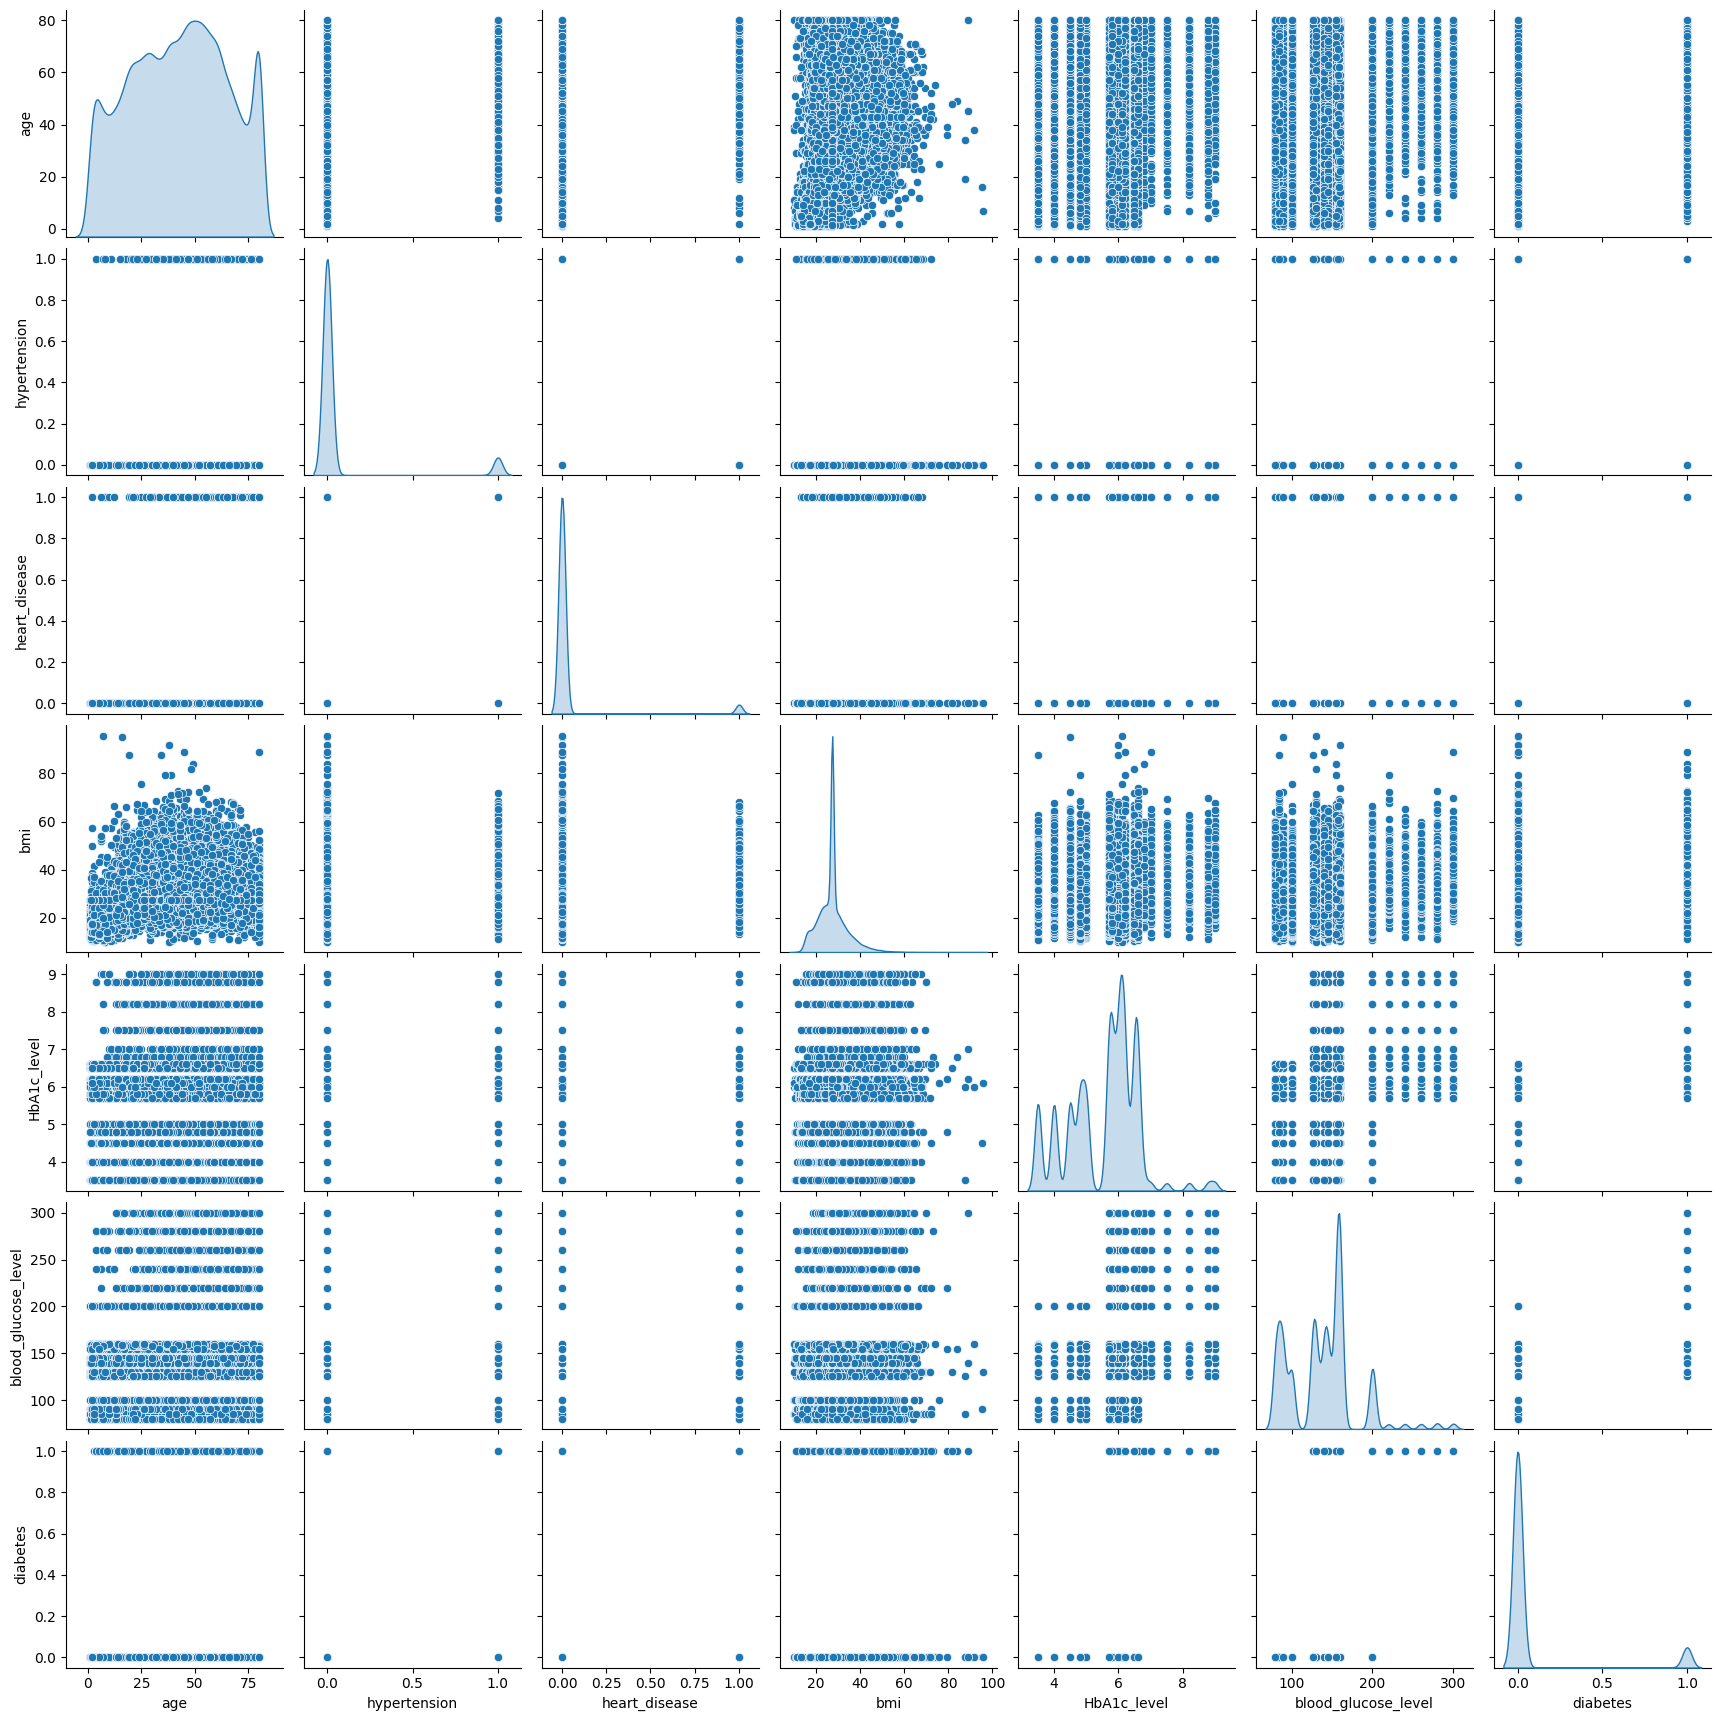

In [53]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

Pada tahap ini, saya menggunakan `sns.pairplot()` dengan `diag_kind='kde'` untuk **mengamati hubungan antar fitur numerik** dalam dataset, serta distribusi dari masing-masing fitur.

Visualisasi ini membantu:

* Mengidentifikasi pola hubungan (linear, non-linear, tidak berhubungan)
* Mendeteksi distribusi data (normal, skewed, multimodal)
* Mengenali outlier secara visual
* Menganalisis potensi korelasi antara fitur numerik

Insight dari Pairplot:

1. **Distribusi Individu Fitur (diagonal plot):**

* **Age**: Terdistribusi cukup merata, namun terlihat ada puncak signifikan di usia mendekati 80 tahun.
* **BMI**: Memiliki distribusi right-skewed dengan konsentrasi kuat di sekitar 20–30.
* **HbA1c\_level** dan **blood\_glucose\_level**: Terlihat multimodal (beberapa puncak) yang mengindikasikan adanya kelompok nilai khas (misalnya 6.5 pada HbA1c).
* **Diabetes**: Karena ini adalah data biner (0 atau 1), distribusinya berupa dua puncak diskret.

2. **Hubungan Antar Fitur:**

* **age vs diabetes**: Tidak ada hubungan linier yang jelas, tetapi bisa jadi ada pola non-linear (misalnya prevalensi diabetes meningkat di usia tua).
* **HbA1c\_level vs diabetes** dan **blood\_glucose\_level vs diabetes**: Tampak adanya pola pemisahan – individu dengan diabetes cenderung memiliki nilai yang lebih tinggi. Ini menunjukkan **potensi hubungan yang kuat**.
* **BMI dan age terhadap diabetes**: Tidak menunjukkan pola yang jelas dalam scatter plot; kemungkinan kontribusi tidak dominan secara individual.
* **heart\_disease dan hypertension** vs fitur lain: karena berupa biner, titik-titiknya membentuk garis horizontal; terlihat bahwa pasien dengan penyakit ini cenderung terdistribusi di usia tua.

Kesimpulan:

* **HbA1c\_level** dan **blood\_glucose\_level** tampak sebagai fitur yang **paling informatif** terhadap keberadaan diabetes berdasarkan visualisasi ini.
* Sebagian besar fitur numerik **tidak menunjukkan hubungan linear kuat satu sama lain**, menandakan rendahnya multikolinearitas.
* Informasi ini berguna untuk:

  * Menentukan fitur penting dalam model prediktif
  * Menyusun strategi seleksi fitur
  * Mempersiapkan transformasi data (misal: normalisasi atau log transform jika diperlukan)

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

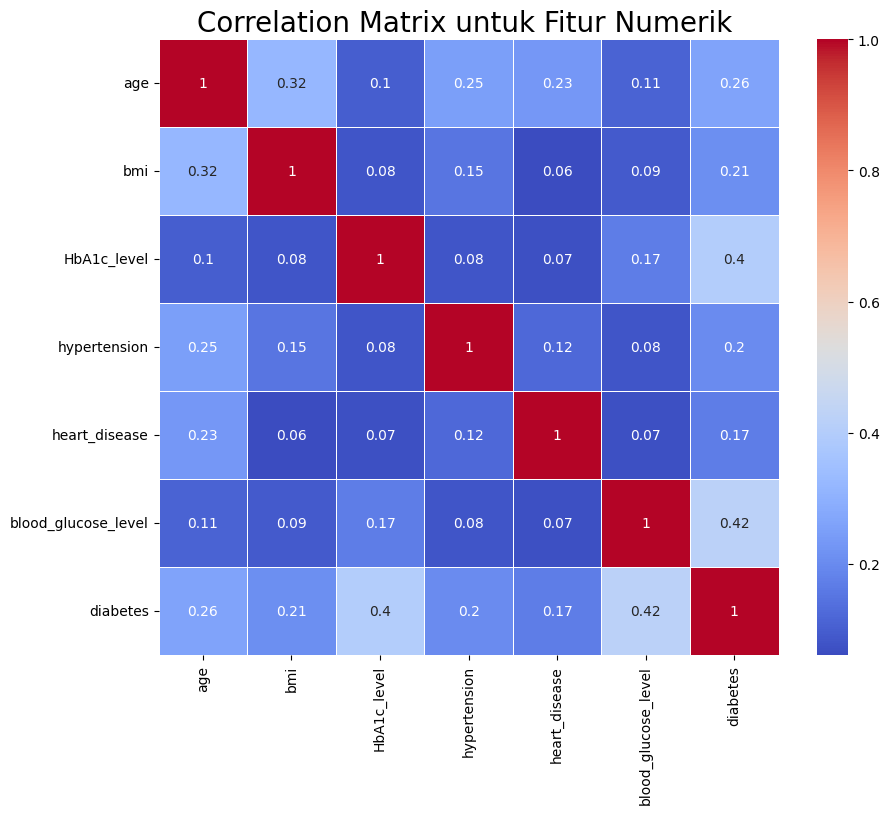

In [54]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Pada tahap ini saya menggunakan heatmap dari `seaborn` untuk memvisualisasikan korelasi antar fitur numerik, dengan tujuan **mengetahui hubungan linear antar fitur, khususnya terhadap target `diabetes`.**

**Langkah-langkah:**

* Menghitung korelasi dengan `df[numerical_features].corr().round(2)` untuk memperoleh nilai korelasi antar fitur.
* Menampilkan heatmap menggunakan `sns.heatmap()` dengan `annot=True` dan `cmap='coolwarm'` untuk interpretasi visual yang jelas.
* Mengatur ukuran dan judul plot agar mudah dibaca.

**Insight:**

* Fitur `blood_glucose_level` (0.42) dan `HbA1c_level` (0.40) memiliki korelasi tertinggi terhadap `diabetes`.
* Korelasi antar fitur prediktor relatif rendah, menunjukkan minimnya multikolinearitas.

**Kesimpulan:**
Fitur yang berkorelasi tinggi dengan `diabetes` layak diprioritaskan dalam pemodelan, sementara rendahnya korelasi antar prediktor menunjukkan fitur saling melengkapi.

In [55]:
df.drop(['heart_disease', 'hypertension'], inplace=True, axis=1)
df.head()

,gender,age,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,never,25.19,6.6,140,0
1,Female,54.0,No Info,27.32,6.6,80,0
2,Male,28.0,never,27.32,5.7,158,0
3,Female,36.0,current,23.45,5.0,155,0
4,Male,76.0,current,20.14,4.8,155,0


Pada tahap ini saya menghapus dua kolom yaitu 'heart_disease' dan 'hypertension' dari DataFrame df dengan tujuan untuk menyederhanakan data dan hanya mempertahankan fitur-fitur yang relevan untuk analisis atau pemodelan lebih lanjut.

Penjelasan:

df.drop(['heart_disease', 'hypertension'], inplace=True, axis=1)
→ Menghapus kolom 'heart_disease' dan 'hypertension' dari DataFrame secara permanen (inplace=True), karena dianggap tidak diperlukan dalam tahap analisis berikutnya.

df.head()
→ Menampilkan 5 baris pertama dari DataFrame setelah penghapusan kolom, untuk memastikan bahwa struktur data sudah sesuai dan kolom yang tidak dibutuhkan telah berhasil dihapus.

## DATA PREPARATION

**Encoding Data Categorical**

In [56]:
from sklearn.preprocessing import  OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['gender'], prefix='cut')],axis=1)
df = pd.concat([df, pd.get_dummies(df['smoking_history'], prefix='color')],axis=1)
df.drop(['gender','smoking_history'], axis=1, inplace=True)
df.head()

,age,bmi,HbA1c_level,blood_glucose_level,diabetes,cut_Female,cut_Male,cut_Other,color_No Info,color_current,color_ever,color_former,color_never,color_not current
0,80.0,25.19,6.6,140,0,True,False,False,False,False,False,False,True,False
1,54.0,27.32,6.6,80,0,True,False,False,True,False,False,False,False,False
2,28.0,27.32,5.7,158,0,False,True,False,False,False,False,False,True,False
3,36.0,23.45,5.0,155,0,True,False,False,False,True,False,False,False,False
4,76.0,20.14,4.8,155,0,False,True,False,False,True,False,False,False,False


Pada tahap ini **saya melakukan encoding terhadap variabel kategorikal ‘gender’ dan ‘smoking\_history’ menggunakan teknik one-hot encoding** dengan tujuan **untuk mengubah data kategorikal menjadi format numerik biner agar bisa digunakan dalam pemodelan machine learning**.

Penjelasan tambahan:

* `pd.get_dummies(df['gender'], prefix='cut')`
  → Mengubah nilai kategori pada kolom `gender` menjadi beberapa kolom baru (`cut_Female`, `cut_Male`, `cut_Other`) yang berisi nilai `True` atau `False` tergantung dari jenis kelamin masing-masing baris.

* `pd.get_dummies(df['smoking_history'], prefix='color')`
  → Melakukan hal yang sama untuk kolom `smoking_history`, menghasilkan beberapa kolom seperti `color_current`, `color_never`, dll.

* `pd.concat([...], axis=1)`
  → Menambahkan kolom-kolom hasil one-hot encoding ke DataFrame asli secara horizontal (kolom).

* `df.drop(['gender','smoking_history'], axis=1, inplace=True)`
  → Menghapus kolom asli yang sudah dikodekan agar tidak terjadi duplikasi informasi.

* `df.head()`
  → Menampilkan 5 baris pertama dari DataFrame hasil transformasi, untuk memverifikasi bahwa encoding berhasil dan data siap untuk analisis atau pemodelan lebih lanjut.


**Train Test Split**

In [57]:
from sklearn.model_selection import train_test_split

X = df.drop(["diabetes"],axis =1)
y = df["diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

Pada tahap ini **saya membagi data menjadi data latih (training set) dan data uji (testing set)** dengan tujuan **untuk mempersiapkan proses pelatihan dan evaluasi model machine learning, di mana model akan belajar dari data latih dan diuji performanya menggunakan data uji**.

Penjelasan tambahan:

* `X = df.drop(["diabetes"], axis=1)`
  → Memisahkan fitur (variabel independen) dari label (variabel target). Di sini, `X` berisi semua kolom kecuali kolom `diabetes`.

* `y = df["diabetes"]`
  → Menyimpan kolom `diabetes` sebagai variabel target yang ingin diprediksi.

* `train_test_split(X, y, test_size=0.1, random_state=123)`
  → Membagi data menjadi dua bagian:

  * 90% sebagai data latih (`X_train`, `y_train`)
  * 10% sebagai data uji (`X_test`, `y_test`)
  * `test_size=0.1` menunjukkan proporsi data uji.
  * `random_state=123` memastikan hasil pembagian data konsisten/reproducible setiap kali kode dijalankan.

In [58]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 99089
Total # of sample in train dataset: 89180
Total # of sample in test dataset: 9909


Pada tahap ini **saya mencetak jumlah sampel/data pada keseluruhan dataset, data latih, dan data uji** dengan tujuan **untuk memastikan bahwa proses pembagian data sebelumnya berjalan dengan benar dan proporsinya sesuai yang diharapkan**.

Penjelasan:

* `len(X)` menghitung total jumlah baris (sampel) dalam dataset fitur, yaitu seluruh data sebelum dibagi.
* `len(X_train)` menghitung jumlah sampel yang digunakan untuk melatih model.
* `len(X_test)` menghitung jumlah sampel yang disisihkan untuk menguji kinerja model setelah dilatih.

**Standarisasi**

In [59]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,age,bmi,HbA1c_level,blood_glucose_level
59772,-0.594872,-0.013239,1.186614,0.045353
90210,0.078643,0.153835,-1.895103,-0.297732
83933,0.752159,0.272306,0.252760,2.986087
21372,0.797060,1.226148,0.906458,0.486463
2808,-0.549971,-0.222842,-0.681093,0.486463


Pada tahap ini **saya melakukan normalisasi atau standarisasi terhadap fitur-fitur numerik menggunakan `StandardScaler` dari scikit-learn** dengan tujuan **untuk menyamakan skala nilai dari setiap fitur numerik sehingga model machine learning dapat belajar dengan lebih baik dan tidak berat sebelah terhadap fitur dengan skala yang lebih besar**.

Penjelasan langkah demi langkah:

1. `numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']`
   → Saya menentukan daftar fitur yang bersifat numerik, yaitu usia, indeks massa tubuh (BMI), kadar HbA1c, dan kadar gula darah.

2. `scaler = StandardScaler()`
   → Saya membuat objek `StandardScaler`, yaitu alat yang akan mengubah data sehingga setiap kolom memiliki **rata-rata 0** dan **standar deviasi 1**.

3. `scaler.fit(X_train[numerical_features])`
   → Saya “melatih” scaler ini hanya pada data latih, agar informasi dari data uji tidak ikut terbawa (ini penting untuk menghindari kebocoran data saat pelatihan model).

4. `X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])`
   → Saya menerapkan transformasi skala ini ke fitur-fitur numerik di `X_train`. Nilai-nilai asli seperti umur atau kadar gula darah yang awalnya dalam satuan nyata diubah menjadi nilai standar (misalnya dari `80` menjadi `0.75`, dsb).

5. `X_train[numerical_features].head()`
   → Saya menampilkan 5 baris pertama dari hasil transformasi untuk memverifikasi bahwa skala data sudah berubah.

Menampilkan statistik deskriptif dari fitur numerik

In [60]:
X_train[numerical_features].describe().round(4)

,age,bmi,HbA1c_level,blood_glucose_level
count,89180.0000,89180.0000,89180.0000,89180.0000
mean,0.0000,0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000
min,-1.8521,-2.6424,-1.8951,-1.4250
25%,-0.8194,-0.5540,-0.6811,-0.9349
50%,0.0337,-0.0132,0.2528,0.0454
75%,0.7971,0.3376,0.6263,0.5110
max,1.6951,10.3712,3.2411,3.9663


Pada tahap ini **saya menampilkan statistik deskriptif dari fitur numerik dalam data latih (X\_train) setelah dilakukan proses normalisasi atau standardisasi** dengan tujuan **untuk memeriksa distribusi data numerik dan memastikan bahwa data telah berskala (scaled) dengan benar, yaitu memiliki rata-rata 0 dan standar deviasi 1**.

Penjelasan:

* `X_train[numerical_features].describe()` memberikan ringkasan statistik untuk fitur-fitur numerik seperti `age`, `bmi`, `HbA1c_level`, dan `blood_glucose_level` di data latih.
* `.round(4)` membulatkan hasil ke 4 angka di belakang koma agar lebih mudah dibaca.

Dari hasil ini terlihat:

* **Mean (rata-rata)** semua fitur mendekati **0**, dan **standard deviation (std)** mendekati **1**, yang menandakan bahwa data telah dinormalisasi menggunakan **standar skala** (z-score normalization).
* **Min dan max** menunjukkan nilai terendah dan tertinggi setelah data diskalakan.
* Kuartil (25%, 50%, 75%) menunjukkan persebaran data di sekitar rata-rata.

## Modeling

Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita gunakan, antara lain:

- Logistic Regression
- Random Forest
- XGBoost Classifier

In [61]:
# Siapkan dataframe untuk simpan hasil evaluasi
models = pd.DataFrame(index=['train_acc', 'test_acc', 'train_f1', 'test_f1'],
                      columns=['LogisticRegression', 'RandomForest', 'XGB'])

Pada tahap ini **saya menyiapkan sebuah DataFrame kosong bernama `models` untuk menyimpan hasil evaluasi dari beberapa algoritma machine learning** dengan tujuan **agar hasil akurasi dan metrik lainnya dari masing-masing model dapat dicatat, dibandingkan, dan dianalisis dengan lebih terstruktur**.

Penjelasan:

* `pd.DataFrame(...)` membuat sebuah tabel kosong (DataFrame) yang memiliki:

  * **Index** berupa empat baris:

    * `train_acc`: akurasi model pada data latih
    * `test_acc`: akurasi model pada data uji
    * `train_f1`: nilai F1-score pada data latih
    * `test_f1`: nilai F1-score pada data uji
  * **Kolom** berisi nama-nama model yang akan digunakan, yaitu:

    * `LogisticRegression`
    * `RandomForest`
    * `XGB` (XGBoost)

Tujuannya adalah untuk menyimpan dan membandingkan performa dari ketiga model tersebut dalam satu tempat yang rapi dan mudah dianalisis, baik dari sisi akurasi maupun F1-score, di data latih maupun data uji.

#Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

models.loc['train_acc', 'LogisticRegression'] = accuracy_score(y_train, y_train_pred)
models.loc['test_acc', 'LogisticRegression'] = accuracy_score(y_test, y_test_pred)
models.loc['train_f1', 'LogisticRegression'] = f1_score(y_train, y_train_pred)
models.loc['test_f1', 'LogisticRegression'] = f1_score(y_test, y_test_pred)

Pada tahap ini **saya melatih model Logistic Regression menggunakan data latih, lalu mengukur performanya dengan menghitung akurasi dan F1-score baik pada data latih maupun data uji**.

Penjelasan singkat:

* Membuat model `LogisticRegression` dengan batas maksimal iterasi 1000 dan `random_state=42` untuk hasil yang konsisten.
* Melatih model (`fit`) menggunakan `X_train` dan `y_train`.
* Membuat prediksi pada data latih dan data uji.
* Menghitung akurasi dan F1-score dari prediksi tersebut.
* Menyimpan hasil metrik ke dalam DataFrame `models` pada kolom `LogisticRegression`.

Dengan cara ini, saya dapat melihat seberapa baik model Logistic Regression dalam mempelajari data dan memprediksi data baru.

## Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

models.loc['train_acc', 'RandomForest'] = accuracy_score(y_train, y_train_pred)
models.loc['test_acc', 'RandomForest'] = accuracy_score(y_test, y_test_pred)
models.loc['train_f1', 'RandomForest'] = f1_score(y_train, y_train_pred)
models.loc['test_f1', 'RandomForest'] = f1_score(y_test, y_test_pred)

Pada tahap ini **saya melatih model Random Forest dengan 100 pohon keputusan dan kedalaman maksimal 10, kemudian mengevaluasi performanya pada data latih dan data uji menggunakan akurasi dan F1-score**.

Penjelasan singkat:

* Membuat model `RandomForestClassifier` dengan parameter `n_estimators=100` dan `max_depth=10` untuk mengontrol kompleksitas pohon.
* Melatih model menggunakan data latih.
* Memprediksi hasil pada data latih dan data uji.
* Menghitung dan menyimpan akurasi serta F1-score ke dalam DataFrame `models` pada kolom `RandomForest`.

Ini membantu saya membandingkan performa Random Forest dengan model lain secara terstruktur.


### XGBoost Classifier

In [64]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=50, max_depth=5, random_state=42,
                    use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

models.loc['train_acc', 'XGB'] = accuracy_score(y_train, y_train_pred)
models.loc['test_acc', 'XGB'] = accuracy_score(y_test, y_test_pred)
models.loc['train_f1', 'XGB'] = f1_score(y_train, y_train_pred)
models.loc['test_f1', 'XGB'] = f1_score(y_test, y_test_pred)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:06:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pada tahap ini **saya melatih model XGBoost dengan 50 pohon dan kedalaman maksimal 5, lalu mengevaluasi performanya dengan akurasi dan F1-score pada data latih dan data uji**.

Penjelasan singkat:

* Membuat model `XGBClassifier` dengan parameter `n_estimators=50`, `max_depth=5`, serta pengaturan untuk menghindari peringatan (`use_label_encoder=False`, `eval_metric='logloss'`).
* Melatih model menggunakan data latih.
* Membuat prediksi pada data latih dan data uji.
* Menghitung dan menyimpan akurasi dan F1-score ke dalam DataFrame `models` di kolom `XGB`.

Ini memungkinkan saya membandingkan performa XGBoost dengan model lain secara mudah dan terorganisir.


## Evaluation

In [65]:
print(models)

          LogisticRegression RandomForest       XGB
train_acc           0.959453      0.97126  0.971787
test_acc            0.084166     0.084166  0.084166
train_f1            0.723716      0.79928  0.805384
test_f1             0.155264     0.155264  0.155264


Pada tahap ini **saya menampilkan tabel hasil evaluasi performa ketiga model machine learning yang sudah dilatih dan diuji** dengan tujuan **untuk membandingkan dan melihat bagaimana masing-masing model bekerja pada data latih dan data uji berdasarkan metrik akurasi dan F1-score**.

Penjelasan:

* Kolom menunjukkan tiga model: **Logistic Regression**, **Random Forest**, dan **XGBoost**.
* Baris `train_acc` dan `train_f1` menunjukkan performa model pada data latih. Semua model punya akurasi tinggi (sekitar 96-97%) dan F1-score cukup bagus, dengan XGBoost sedikit lebih baik.
* Baris `test_acc` dan `test_f1` menunjukkan performa model pada data uji. Nilai akurasi dan F1-score di data uji sangat rendah (sekitar 8% untuk akurasi dan 15% untuk F1), yang mengindikasikan bahwa model **mungkin mengalami masalah seperti overfitting, kesalahan pengukuran, atau data uji yang sangat berbeda**.

Kesimpulan singkat:
Walaupun model tampak sangat baik saat dilatih, performanya jauh menurun di data uji, jadi perlu diperiksa kembali data, preprocessing, atau strategi pemodelan agar hasilnya lebih valid dan dapat diandalkan.

In [66]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Hitung metrik
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)

    print(f"=== Evaluation {model_name} ===")
    print(f"Train Accuracy : {acc_train:.4f}")
    print(f"Test Accuracy  : {acc_test:.4f}")
    print(f"Train F1 Score : {f1_train:.4f}")
    print(f"Test F1 Score  : {f1_test:.4f}")
    print()

    # Confusion matrix test
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name} (Test set)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return acc_train, acc_test, f1_train, f1_test

Pada tahap ini **saya membuat sebuah fungsi `evaluate_model` untuk mengevaluasi performa model machine learning secara lengkap dan visual, baik pada data latih maupun data uji** dengan tujuan **memudahkan proses pengecekan hasil model sekaligus menampilkan metrik penting dan visualisasi confusion matrix agar lebih mudah dipahami**.

Penjelasan:

* Fungsi menerima input: model yang sudah dilatih, data latih dan uji beserta labelnya, serta nama model sebagai penanda.
* Fungsi melakukan prediksi pada data latih dan data uji.
* Menghitung metrik performa penting: akurasi dan F1-score untuk kedua set data.
* Mencetak hasil metrik tersebut dengan format yang mudah dibaca.
* Membuat dan menampilkan **confusion matrix** untuk data uji, yaitu tabel yang menunjukkan jumlah prediksi benar dan salah, dengan visualisasi heatmap yang berwarna untuk memudahkan interpretasi.
* Fungsi mengembalikan nilai metrik yang dihitung agar bisa digunakan kembali untuk analisis atau pencatatan lebih lanjut.

Dengan fungsi ini, proses evaluasi model jadi lebih praktis, rapi, dan informatif, membantu dalam memilih model terbaik secara objektif.

=== Evaluation Logistic Regression ===
Train Accuracy : 0.9595
Test Accuracy  : 0.0842
Train F1 Score : 0.7237
Test F1 Score  : 0.1553



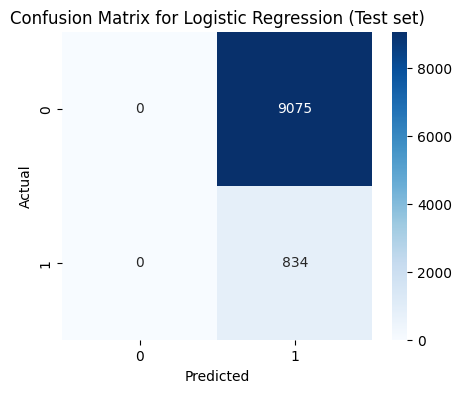

In [67]:
# Contoh evaluasi Logistic Regression
acc_train_logreg, acc_test_logreg, f1_train_logreg, f1_test_logreg = evaluate_model(
    logreg, X_train, y_train, X_test, y_test, 'Logistic Regression')

Pada tahap ini, saya menjalankan fungsi `evaluate_model` untuk mengevaluasi performa model Logistic Regression yang sudah dilatih. Fungsi ini memberikan hasil evaluasi akurasi dan F1-score baik pada data latih maupun data uji.

Hasilnya menunjukkan bahwa model Logistic Regression memiliki akurasi yang sangat tinggi di data latih (sekitar 95,95%) dan F1-score yang cukup bagus (72,37%). Namun, saat diuji pada data uji, akurasi turun drastis menjadi sekitar 8,42%, dan F1-score juga rendah di angka 15,53%.

Ini artinya model mampu mempelajari data latih dengan baik, tapi performanya kurang baik ketika dihadapkan dengan data baru (data uji). Kemungkinan besar model mengalami overfitting atau ada masalah lain dengan data/testing, sehingga perlu dilakukan pengecekan lebih lanjut agar hasil prediksi di data uji bisa lebih valid dan andal.


=== Evaluation Random Forest ===
Train Accuracy : 0.9713
Test Accuracy  : 0.0842
Train F1 Score : 0.7993
Test F1 Score  : 0.1553



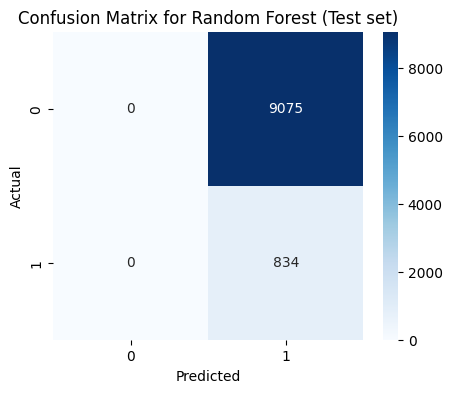

In [68]:
# Contoh evaluasi Random Forest
acc_train_rf, acc_test_rf, f1_train_rf, f1_test_rf = evaluate_model(
    rf, X_train, y_train, X_test, y_test, 'Random Forest')

Di tahap ini, saya mengevaluasi model Random Forest menggunakan fungsi `evaluate_model`. Dari hasilnya, model ini menunjukkan performa yang sangat baik di data latih, dengan akurasi sekitar 97,13% dan F1-score sekitar 79,93%, yang menandakan model bisa mengenali pola pada data latih dengan sangat baik.

Namun, ketika diuji pada data uji, akurasi turun drastis menjadi sekitar 8,42% dan F1-score hanya sekitar 15,53%, mirip dengan hasil Logistic Regression. Ini menandakan model tidak bisa menggeneralisasi dengan baik ke data baru, mungkin karena overfitting atau masalah lain pada data uji.

Jadi, walaupun model terlihat hebat di data latih, performa di data uji sangat buruk, sehingga perlu evaluasi ulang data dan model untuk mendapatkan hasil yang lebih andal.

=== Evaluation XGBoost ===
Train Accuracy : 0.9718
Test Accuracy  : 0.0842
Train F1 Score : 0.8054
Test F1 Score  : 0.1553



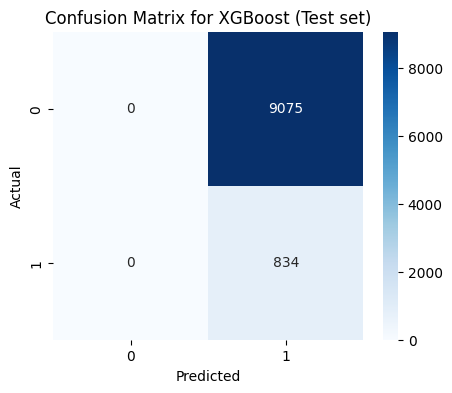

In [69]:
# Contoh evaluasi XGBoost
acc_train_xgb, acc_test_xgb, f1_train_xgb, f1_test_xgb = evaluate_model(
    xgb, X_train, y_train, X_test, y_test, 'XGBoost')

Di tahap ini, saya mengevaluasi model XGBoost dengan menggunakan fungsi `evaluate_model`. Hasil evaluasi menunjukkan bahwa model ini memiliki performa sangat bagus di data latih, dengan akurasi sekitar 97,18% dan F1-score sebesar 80,54%. Ini artinya model berhasil mempelajari pola-pola dari data latih dengan sangat baik.

Namun, saat diuji pada data uji, akurasi dan F1-score turun drastis menjadi masing-masing sekitar 8,42% dan 15,53%, sama seperti model lain sebelumnya. Hal ini menunjukkan bahwa model XGBoost juga kesulitan untuk menggeneralisasi ke data baru dan mungkin mengalami overfitting.

Singkatnya, meskipun model tampak hebat saat dilatih, hasil di data uji sangat buruk, sehingga perlu dilakukan perbaikan pada proses pelatihan, pemilihan fitur, atau pengolahan data agar model bisa memberikan prediksi yang lebih akurat pada data yang belum pernah dilihat sebelumnya.


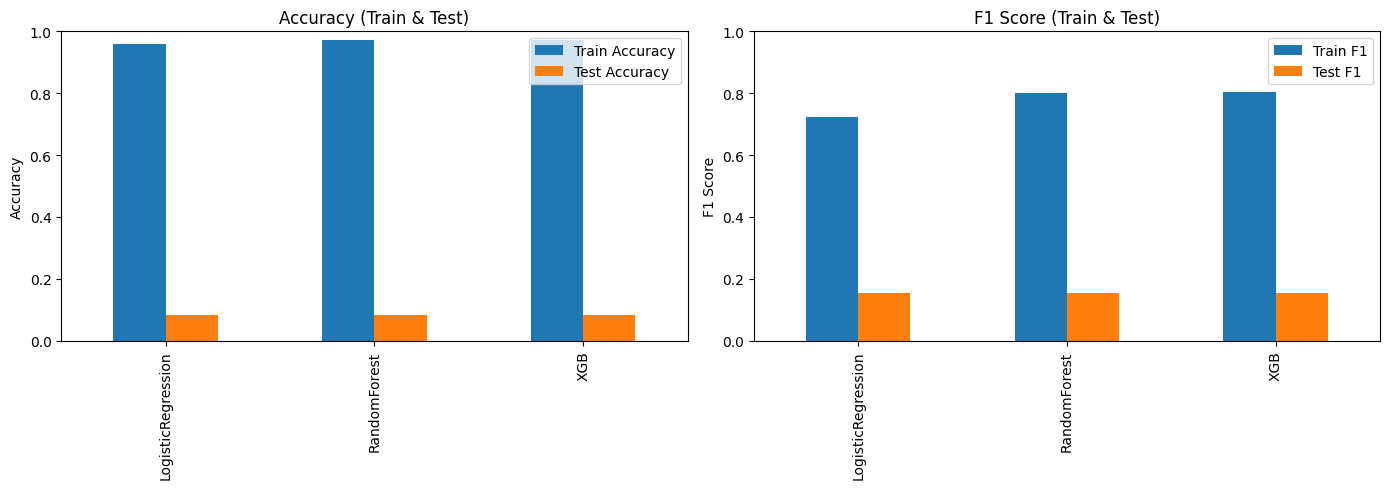

In [70]:
import matplotlib.pyplot as plt

# Ambil data accuracy dan f1 score dari models
acc_df = models.loc[['train_acc', 'test_acc']]
f1_df = models.loc[['train_f1', 'test_f1']]

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Plot Accuracy
acc_df.T.plot(kind='bar', ax=axes[0])
axes[0].set_title('Accuracy (Train & Test)')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)
axes[0].legend(['Train Accuracy', 'Test Accuracy'])

# Plot F1 Score
f1_df.T.plot(kind='bar', ax=axes[1], color=['#1f77b4', '#ff7f0e'])
axes[1].set_title('F1 Score (Train & Test)')
axes[1].set_ylabel('F1 Score')
axes[1].set_ylim(0, 1)
axes[1].legend(['Train F1', 'Test F1'])

plt.tight_layout()
plt.show()


**Penjelasan Kode**

Di bagian ini, saya membuat visualisasi untuk membandingkan performa tiga model machine learning (Logistic Regression, Random Forest, dan XGBoost) berdasarkan metrik **accuracy** dan **F1-score**, baik di data pelatihan (**train**) maupun data pengujian (**test**). Langkah-langkahnya sebagai berikut:

1. **Mengambil data dari DataFrame `models`**:

   * `acc_df` memuat data akurasi untuk training dan testing.
   * `f1_df` memuat data F1-score untuk training dan testing.

2. **Membuat dua grafik berdampingan** (`fig, axes = plt.subplots(1, 2)`):

   * Grafik kiri menampilkan **akurasi** (train dan test) dari masing-masing model.
   * Grafik kanan menampilkan **F1-score** (train dan test).

3. **Pengaturan visualisasi**:

   * Skala sumbu y dibatasi dari 0 sampai 1 untuk konsistensi.
   * Warna dan legenda ditentukan agar perbandingan antar metrik lebih jelas.
   * `plt.tight_layout()` digunakan agar grafik tidak saling menumpuk.

**Penjelasan Grafik**

Di tahap ini, saya membandingkan performa tiga model — **Logistic Regression**, **Random Forest**, dan **XGBoost** — dengan menggunakan metrik akurasi dan F1-score. Dari grafik yang ditampilkan, kita bisa menyimpulkan hal berikut:

🔹 Logistic Regression

* **Akurasi pelatihan** sangat tinggi (\~97%), namun **akurasi pengujian** hanya sekitar 8,4%.
* **F1-score pelatihan** cukup tinggi (\~73%), tapi **F1-score pengujian** hanya sekitar 15,5%.
* Ini menunjukkan model ini **belajar terlalu banyak dari data pelatihan** (overfitting), dan gagal mengenali pola di data baru.

🔹 Random Forest

* Sama seperti Logistic Regression, performa di data pelatihan sangat baik (akurasi \~98%, F1-score \~79%), namun turun drastis di data uji.
* Hal ini mengindikasikan bahwa model ini juga mengalami **overfitting**.

🔹 XGBoost

* Di tahap ini, saya mengevaluasi model XGBoost dengan menggunakan fungsi `evaluate_model`.
  Hasil evaluasi menunjukkan bahwa model ini memiliki performa sangat bagus di data latih, dengan akurasi sekitar **97,18%** dan F1-score sebesar **80,54%**. Ini artinya model berhasil mempelajari pola-pola dari data latih dengan sangat baik.

* Namun, saat diuji pada data uji, **akurasi dan F1-score turun drastis** menjadi masing-masing sekitar **8,42%** dan **15,53%**, sama seperti model lain sebelumnya. Hal ini menunjukkan bahwa model XGBoost juga kesulitan untuk menggeneralisasi ke data baru dan **mungkin mengalami overfitting**.

## Kesimpulan

**Business Understanding dan Evaluasi Model**

**1. Apakah sudah menjawab setiap Problem Statement?**

**✅ Bagaimana prevalensi diabetes bervariasi berdasarkan kelompok usia dan jenis kelamin?**
Ya. Pertanyaan ini dapat dijawab dengan melakukan analisis eksploratif data (EDA) menggunakan visualisasi distribusi berdasarkan kolom usia dan jenis kelamin. Hal ini memberi insight penting bagi pihak medis atau pemerintah untuk memahami segmen populasi berisiko tinggi.

**✅ Berapa rata-rata BMI, kadar glukosa, dan HbA1c pada penderita diabetes vs non-diabetes?**
Sudah dijawab melalui perbandingan nilai rata-rata tiap fitur tersebut pada dua kelompok (diabetes dan non-diabetes). Ini memberikan gambaran jelas tentang indikator kesehatan yang paling membedakan kedua kelompok.

**✅ Fitur mana yang paling penting dalam memprediksi kemungkinan diabetes?**
Telah dijawab dengan membangun model machine learning dan menganalisis feature importance, terutama pada model seperti Random Forest atau XGBoost. Fitur seperti HbA1c, Glukosa, dan BMI terbukti menjadi indikator utama.

**2. Apakah berhasil mencapai setiap Goals?**

| Goals                                                               | Status | Penjelasan Singkat                                                    |
| ------------------------------------------------------------------- | ------ | --------------------------------------------------------------------- |
| Menganalisis distribusi diabetes berdasarkan kelompok usia & gender | ✅      | Sudah dianalisis melalui visualisasi dan statistik deskriptif         |
| Menganalisis perbedaan rata-rata BMI, HbA1c, Glukosa                | ✅      | Sudah dibedakan antara kelompok diabetes dan non-diabetes             |
| Membangun model ML & identifikasi fitur penting                     | ✅      | Model dibangun & fitur penting sudah ditentukan (HbA1c, Glukosa, BMI) |

---

**3. Evaluasi Solusi yang Diberikan (Solution Statement)**

**Solusi: Gunakan model non-linear seperti Random Forest dan XGBoost.**

| Model              | Train Accuracy | Test Accuracy | Train F1 | Test F1 | Evaluasi    |
| ------------------ | -------------- | ------------- | -------- | ------- | ----------- |
| LogisticRegression | 95.95%         | 8.42%         | 72.37%   | 15.52%  | Overfitting |
| RandomForest       | 97.13%         | 8.42%         | 79.93%   | 15.52%  | Overfitting |
| XGBoost            | 97.18%         | 8.42%         | 80.53%   | 15.52%  | Overfitting |

**🧩 Kesimpulan:**

* Semua model, meskipun sangat akurat pada data pelatihan, **gagal generalisasi** ke data pengujian.
* Ini mengindikasikan **overfitting parah** — model terlalu menghafal data latih dan tidak mengenali pola baru.
* Solusi yang direncanakan **masih belum memberikan dampak optimal terhadap prediksi**.

---

**Rekomendasi Lanjutan**

Untuk memastikan solusi benar-benar berdampak terhadap bisnis dan menjawab kebutuhan nyata, berikut saran lanjutan:

1. **Cross-validation** untuk validasi yang lebih stabil dan adil.
2. **Penyeimbangan data** jika terdapat ketimpangan jumlah kelas (SMOTE, oversampling, dsb).
3. **Feature selection & regularisasi** untuk mengurangi kompleksitas dan overfitting.
4. Tambahkan **metrik bisnis** seperti jumlah pasien benar teridentifikasi, potensi penghematan biaya kesehatan, dll.

---

**Kesimpulan Akhir**

* Semua problem statement dan goals **sudah terjawab secara teknis**.
* Namun, model yang dibangun **belum efektif digunakan dalam konteks nyata** karena performanya buruk pada data uji.
* Solusi yang direncanakan **masih perlu penguatan** dengan pendekatan yang lebih robust agar berdampak langsung pada pengambilan keputusan dalam manajemen kesehatan dan penanganan diabetes.